In [153]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

Load reservation data and merge columns.

In [62]:
df = pd.read_csv("SELECT_overnattingsdato__koienavn__SUM_a.csv", header=None)
df.columns=["ds", "Koie", "M", "NM"]
df.head()

,ds,Koie,M,NM
0,1999-10-08,Agdenes,2,0
1,1999-10-09,Agdenes,5,2
2,1999-10-15,Agdenes,6,1
3,1999-10-16,Agdenes,6,1
4,1999-10-22,Agdenes,5,5


In [63]:
df["y"] = df["M"] + df["NM"]
df = df.drop(["M", "NM"], axis=1)
df.head()

,ds,Koie,y
0,1999-10-08,Agdenes,2
1,1999-10-09,Agdenes,7
2,1999-10-15,Agdenes,7
3,1999-10-16,Agdenes,7
4,1999-10-22,Agdenes,10


Group the dataframe by cabin name

In [64]:
gdf = df.groupby("Koie")
gdf.sum()

,y
Koie,
Agdenes,6042
Brygga,286
Flåkoia,18577
Fosenkoia,7461
Heinfjordstua,23032
Hognabu,4995
Holmsåkoia,12226
Holvassgamma,4958
Iglbu,5524


Lets work with flåkoia

In [65]:
flaDF = gdf.get_group("Flåkoia")
flaDF.reset_index()
flaDF_train = flaDF.iloc[:2700]
flaDF_test = flaDF.iloc[2700:]

In [66]:
flaDF_train.shape

(2700, 2)

In [67]:
flaDF_test.shape

(351, 2)

In [75]:
flaDF_train.tail()

,ds,y
4337,2018-01-25,3
4338,2018-01-26,11
4339,2018-01-27,10
4340,2018-01-28,11
4341,2018-01-29,5


In [129]:
m = Prophet()
m.fit(flaDF_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [130]:
future = m.make_future_dataframe(periods=493)

In [131]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3188,2019-06-02,6.993517,2.855668,11.571661
3189,2019-06-03,6.649823,2.454441,11.160037
3190,2019-06-04,6.066868,1.472732,10.213225
3191,2019-06-05,6.363844,1.953546,10.828836
3192,2019-06-06,6.815389,2.559523,11.197671


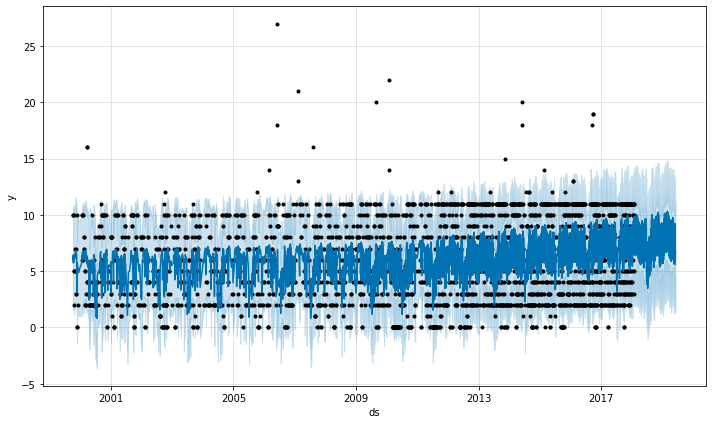

In [132]:
fig1 = m.plot(forecast)

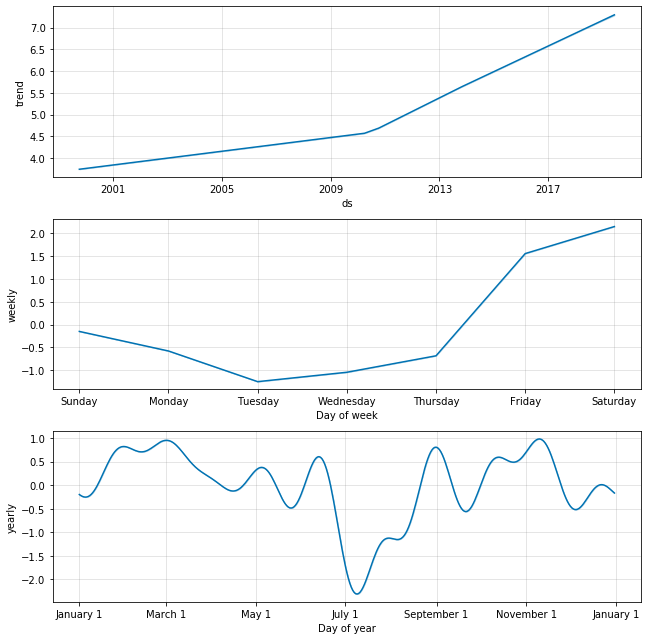

In [133]:
fig2 = m.plot_components(forecast)

Compare forecast model with test data

In [156]:
ys = []
yhats = []
xs = []
for index, row in flaDF_test.iterrows():
    xs.append(row["ds"])
    y = row["y"]
    yhat = forecast.loc[forecast["ds"]==row["ds"]]["yhat"].values[0]
    ys.append(y)
    yhats.append(yhat)


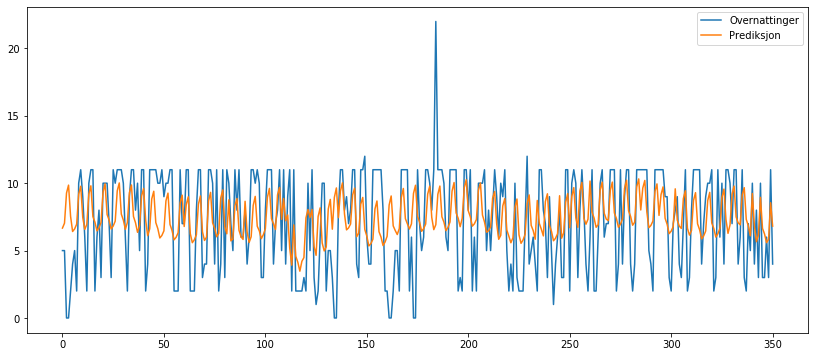

In [169]:
plt.figure(figsize=(14, 6))
plt.plot(ys, label="Overnattinger")
plt.plot(yhats, label="Prediksjon")
plt.legend()
plt.show()